# Imports and URLs

# Data Dictionary
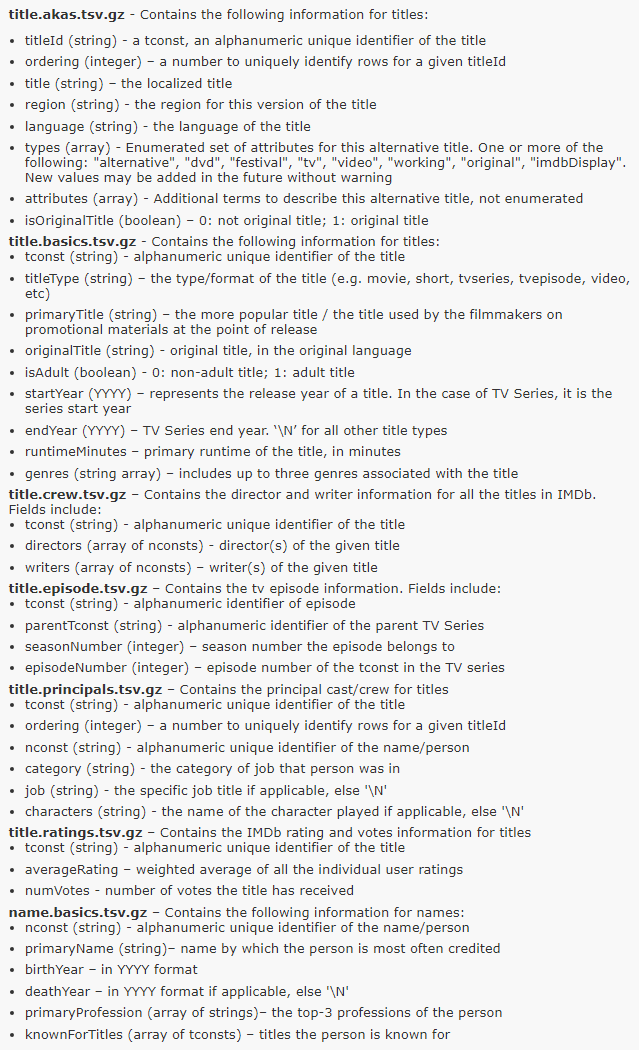

In [64]:
import pandas as pd
import numpy as np
import os, time,json
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook

titlebasicsURL = "https://datasets.imdbws.com/title.basics.tsv.gz"
titleakasURL = "https://datasets.imdbws.com/title.akas.tsv.gz"
titleratingsURL = "https://datasets.imdbws.com/title.ratings.tsv.gz"

In [78]:
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies(movie_id)
# save the .info .releases dictionaries
    info = movie.info()
    releases = movie.releases()
# Loop through countries in releases
    for c in releases['countries']:
    # if the country abbreviation==US
        if c['iso_3166_1' ] =='US':
        ## save a "certification" key in the info dict with the certification
            info['certification'] = c['certification']
    return info

In [83]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)# filter out any ids that are already in the JSON_FILE

In [2]:
# Showing basics file
basics = pd.read_csv(titlebasicsURL, sep='\t', low_memory=False)
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
9733629,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
9733630,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
9733631,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
9733632,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [3]:
# Showing akas file
akas = pd.read_csv(titleakasURL, sep='\t', low_memory=False)
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
...,...,...,...,...,...,...,...,...
35431297,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
35431298,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
35431299,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
35431300,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0


In [4]:
# Showing ratings file
ratings = pd.read_csv(titleratingsURL, sep='\t', low_memory=False)
ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1967
1,tt0000002,5.8,263
2,tt0000003,6.5,1803
3,tt0000004,5.6,179
4,tt0000005,6.2,2603
...,...,...,...
1295397,tt9916730,8.3,10
1295398,tt9916766,7.0,21
1295399,tt9916778,7.2,36
1295400,tt9916840,8.8,6


# Replacing "\N" with Nan

In [5]:
# Replacing "\N" with Nan
basics = basics.replace({'\\N' : np.nan})
akas = akas.replace({'\\N' : np.nan})
ratings = ratings.replace({'\\N' : np.nan})

# Eliminate movies that are null for runtimeMinutes

In [6]:
# Eliminate movies that are null for runtimeMinutes
basics.dropna(subset = ["runtimeMinutes"], inplace = True)
basics["runtimeMinutes"].isna().sum()

0

# Eliminate movies that are null for genre

In [7]:
# Eliminate movies that are null for genre
basics.dropna(subset = ["genres"], inplace = True)
basics["genres"].isna().sum()

0

# Keep only titleType==Movie

In [8]:
# keep only titleType==Movie
moviefilter = basics["titleType"] == "movie"
basics[moviefilter]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,NaN,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,NaN,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
9733400,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"
9733484,tt9916538,movie,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,0,2019,NaN,123,Drama
9733525,tt9916622,movie,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,0,2015,NaN,57,Documentary
9733552,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,NaN,100,Documentary


# Keep startYear 2000-2022

In [9]:
# keep startYear 2000-2022
basics.dropna(subset = ["startYear"], inplace = True)
basics["startYear"].isna().sum()

basics["startYear"] = basics["startYear"].astype(int)

yearfilter = basics["startYear"] >= 2000
basics[yearfilter]

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
13082,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,NaN,94,Documentary
33803,tt0034413,short,Youth Gets a Break,Youth Gets a Break,0,2001,NaN,20,Short
34617,tt0035235,short,Radio Dynamics,Radio Dynamics,0,2016,NaN,4,Short
34803,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
39545,tt0040241,short,Color Rhapsodie,Color Rhapsodie,0,2021,NaN,6,Short
...,...,...,...,...,...,...,...,...,...
9733584,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0,2013,NaN,49,Documentary
9733590,tt9916766,tvEpisode,Episode #10.15,Episode #10.15,0,2019,NaN,43,"Family,Game-Show,Reality-TV"
9733625,tt9916840,tvEpisode,Horrid Henry's Comic Caper,Horrid Henry's Comic Caper,0,2014,NaN,11,"Adventure,Animation,Comedy"
9733632,tt9916856,short,The Wind,The Wind,0,2015,NaN,27,Short


# Exclude movies that are included in the documentary category.

In [10]:
# Exclude movies that are included in the documentary category.
is_documentary = basics['genres'].str.contains('documentary',case=False)
basics = basics[~is_documentary]

# Keep only US movies

In [11]:
# Filter for US only region 
usfilter = akas["region"] == "US"
akas = akas[usfilter]

In [12]:
# Filter the basics table down to only include the US by using the filter akas dataframe
keepers = basics['tconst'].isin(akas['titleId'])
keepers

1           True
2          False
3          False
4           True
5           True
           ...  
9733557    False
9733590    False
9733625    False
9733632    False
9733633    False
Name: tconst, Length: 2229899, dtype: bool

In [13]:
basics = basics.loc[moviefilter & yearfilter & keepers, :]
display(basics)
basics.info()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
34803,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
61116,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70,Drama
67669,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
86801,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
93938,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama
...,...,...,...,...,...,...,...,...,...
9732772,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,NaN,74,Drama
9733167,tt9915872,movie,The Last White Witch,My Girlfriend is a Wizard,0,2019,NaN,97,"Comedy,Drama,Fantasy"
9733307,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
9733316,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87509 entries, 34803 to 9733400
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          87509 non-null  object
 1   titleType       87509 non-null  object
 2   primaryTitle    87509 non-null  object
 3   originalTitle   87509 non-null  object
 4   isAdult         87509 non-null  object
 5   startYear       87509 non-null  int32 
 6   endYear         0 non-null      object
 7   runtimeMinutes  87509 non-null  object
 8   genres          87509 non-null  object
dtypes: int32(1), object(8)
memory usage: 6.3+ MB


# Ratings: Keep only US movies

In [14]:
keepers2 = ratings["tconst"].isin(akas["titleId"])
ratings = ratings[keepers2]
display(ratings)
ratings.info()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1967
1,tt0000002,5.8,263
4,tt0000005,6.2,2603
5,tt0000006,5.1,178
6,tt0000007,5.4,817
...,...,...,...
1295366,tt9916200,8.1,226
1295367,tt9916204,8.2,259
1295374,tt9916348,8.3,18
1295375,tt9916362,6.4,5254


<class 'pandas.core.frame.DataFrame'>
Int64Index: 493814 entries, 0 to 1295379
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         493814 non-null  object 
 1   averageRating  493814 non-null  float64
 2   numVotes       493814 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 15.1+ MB


# Akas info()

In [15]:
display(akas)
akas.info()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
14,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
33,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
36,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
41,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0
...,...,...,...,...,...,...,...,...
35430828,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,NaN,imdbDisplay,NaN,0
35430898,tt9916620,1,The Copeland Case,US,NaN,imdbDisplay,NaN,0
35430987,tt9916702,1,Loving London: The Playground,US,NaN,NaN,NaN,0
35431030,tt9916756,1,Pretty Pretty Black Girl,US,NaN,imdbDisplay,NaN,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426181 entries, 5 to 35431046
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1426181 non-null  object
 1   ordering         1426181 non-null  int64 
 2   title            1426181 non-null  object
 3   region           1426181 non-null  object
 4   language         3872 non-null     object
 5   types            976624 non-null   object
 6   attributes       46308 non-null    object
 7   isOriginalTitle  1424836 non-null  object
dtypes: int64(1), object(7)
memory usage: 97.9+ MB


# Saving Files

In [16]:
# example making new folder with os
import os
os.makedirs('Data/',exist_ok=True) 
# Confirm folder created
os.listdir("Data/")

['title_akas.csv.gz', 'title_basics.csv.gz', 'title_ratings.csv.gz']

In [17]:
## Save current dataframe to file.
basics.to_csv("Data/title_basics.csv.gz", compression = 'gzip', index = False)
ratings.to_csv("Data/title_ratings.csv.gz", compression = 'gzip', index = False)
akas.to_csv("Data/title_akas.csv.gz", compression = 'gzip', index = False)

In [18]:
# Open saved file and preview again
basics = pd.read_csv("Data/title_basics.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002,NaN,126,Drama


In [19]:
# Open saved file and preview again
akas = pd.read_csv("Data/title_akas.csv.gz", low_memory = False)
akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0.0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0.0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0.0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0.0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0.0


In [36]:
# Open saved file and preview again
ratings = pd.read_csv("Data/title_ratings.csv.gz", low_memory = False)
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1967
1,tt0000002,5.8,263
2,tt0000005,6.2,2603
3,tt0000006,5.1,178
4,tt0000007,5.4,817
